In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Penguins data - Quick view

In [2]:
df = sns.load_dataset("penguins")
df = df.dropna(subset=["body_mass_g", "flipper_length_mm", "bill_length_mm", "bill_depth_mm", "species"])
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


## Fit a basic OLS model 

In [3]:
import statsmodels.formula.api as smf
formula = "body_mass_g ~ flipper_length_mm + C(species)"
model = smf.ols(formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     405.7
Date:                Mon, 17 Nov 2025   Prob (F-statistic):          1.25e-111
Time:                        06:46:50   Log-Likelihood:                -2510.8
No. Observations:                 342   AIC:                             5030.
Df Residuals:                     338   BIC:                             5045.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -4

## Visualize data with regressions by species

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

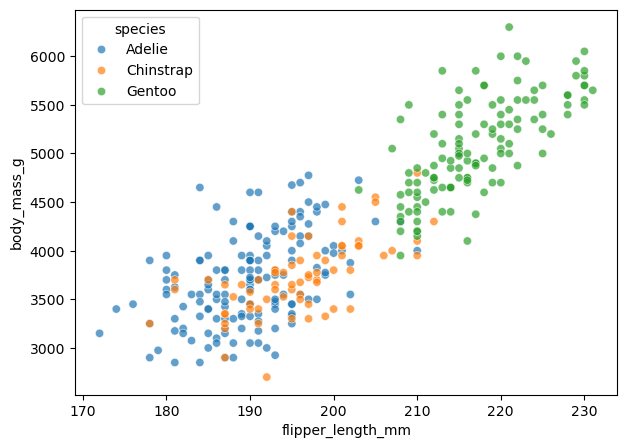

In [4]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="flipper_length_mm", y="body_mass_g", hue="species", alpha=0.7)

### add fitted lines per species

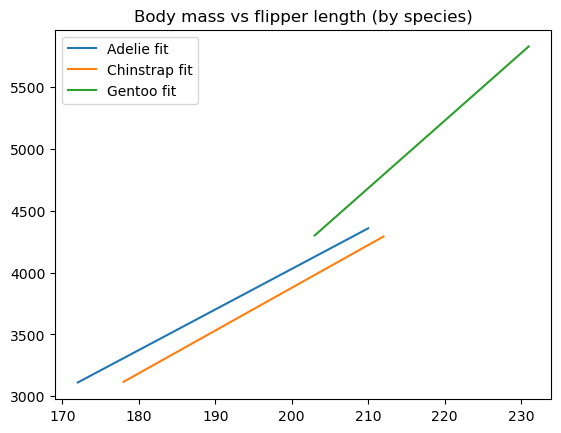

In [5]:
for sp in df["species"].unique():
    sub = df[df["species"] == sp]
    m, b = np.polyfit(sub["flipper_length_mm"], sub["body_mass_g"], 1)
    xs = np.linspace(sub["flipper_length_mm"].min(), sub["flipper_length_mm"].max(), 50)
    plt.plot(xs, m*xs + b, label=f"{sp} fit")
plt.title("Body mass vs flipper length (by species)")
plt.legend()
plt.show()

## Residual diagnostics: residuals vs fitted & QQ plot

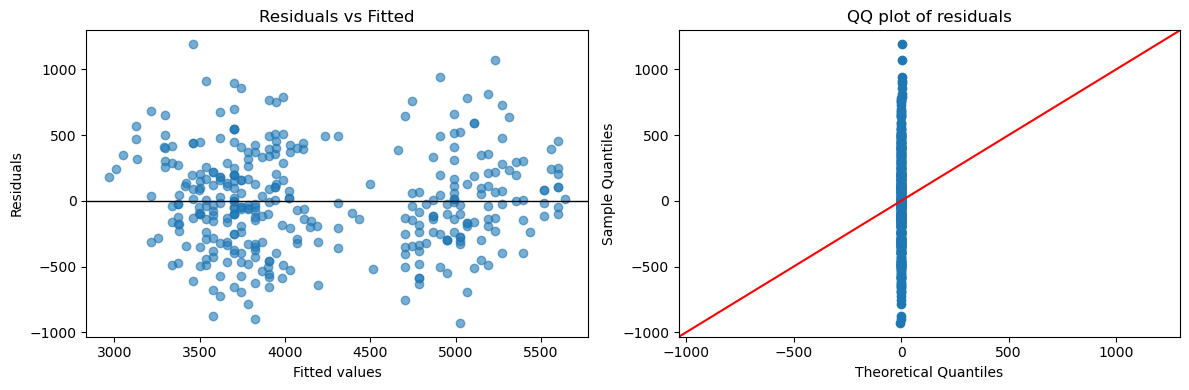

In [7]:
import statsmodels.api as sm
fitted = model.fittedvalues
resid = model.resid
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(fitted, resid, alpha=0.6)
ax[0].axhline(0, color='k', lw=1)
ax[0].set_xlabel("Fitted values"); ax[0].set_ylabel("Residuals"); ax[0].set_title("Residuals vs Fitted")

sm.qqplot(resid, line='45', ax=ax[1])
ax[1].set_title("QQ plot of residuals")
plt.tight_layout()
plt.show()